In [1]:
import pandas as pd

In [ ]:
# Read the CSV file
df = pd.read_csv('C:/xampp/htdocs/git/MobilePhonePricePrediction/Data/Raw/Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
# Dropping the 'Product_id' column as it is not needed for analysis
df.drop(columns=['Product_id'], inplace=True)



In [8]:
df.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
# Renaming the 'resoloution' column to 'resolution' for consistency
df.rename(columns={'resoloution': 'resolution'}, inplace=True)


In [10]:
df.head()

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
# Convert all column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()


,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
# Checking null values
print(df.isnull().sum())


price           0
sale            0
weight          0
resolution      0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rearcam         0
front_cam       0
battery         0
thickness       0
dtype: int64


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


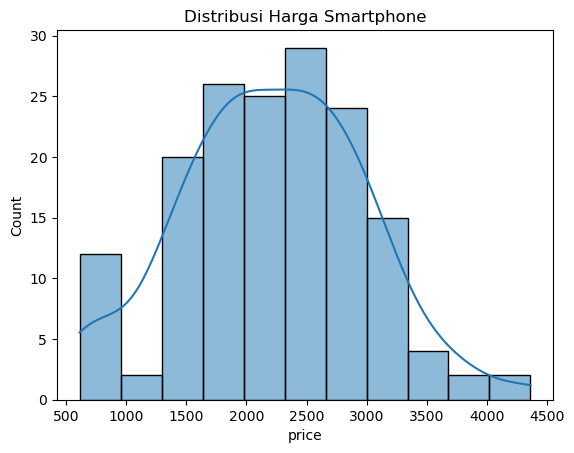

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Smartphone')
plt.show()

In [15]:
def price_category(price):
    if price < 1700:
        return 'Low'
    elif price < 2700:
        return 'Mid'
    else:
        return 'High'

df['price_range'] = df['price'].apply(price_category)

df['price_range'].value_counts()


price_range
Mid     78
High    45
Low     38
Name: count, dtype: int64

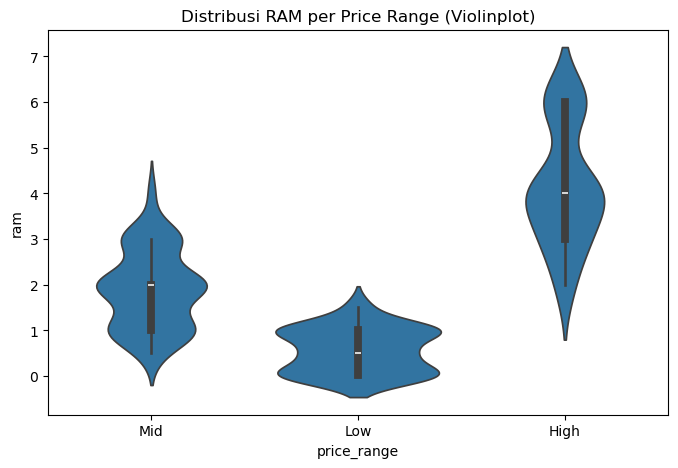

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='price_range', y='ram', data=df)
plt.title('Distribusi RAM per Price Range (Violinplot)')
plt.show()
